# Biodiversity Monitoring: Implement Phase

In this notebook, you will implement a pipeline for detecting and classifying animals.  

The steps you will complete in this notebook are the following:
1. Import Python packages
2. Load the metadata
3. Load the fine tuned model
4. Load the MegaDetector 
5. Detect and classify animals

## 1. Import Python packages

Run the next cell to import that Python packages you'll need for this lab.

Note the `import utils2` line. This line imports the functions that were specifically written for this lab. If you want to look at what these functions are, go to `File -> Open...` and open the `utils2.py` file to have a look.

In [1]:
# packages for interacting with the operating system and logging
import os, sys 
import logging

# Tensorflow neural network framework packages
import tensorflow as tf
from tensorflow.keras.applications import nasnet

from IPython.display import display # package for displaying images in Jupyter
from PIL import Image # package for loading images in Python

# Setup some paths for MegaDetector
os.environ['PYTHONPATH'] += ":/home/jovyan/work/ai4eutils"
os.environ['PYTHONPATH'] += ":/home/jovyan/work/CameraTraps"
os.environ['PYTHONPATH'] += ":/home/jovyan/work/yolov5"
sys.path.insert(0, "./ai4eutils")
sys.path.insert(0, "./CameraTraps")
sys.path.insert(0, "./yolov5")

# Supress the TF warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # Ignore tf warning messages
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

# Load the Pytorch Detector
from detection.pytorch_detector import PTDetector


import utils2 # utility functions defined for this lab

print('All packages imported successfully!')

Using PyTorch version 1.10.1+cu102
All packages imported successfully!


## 2. Load the Metadata

The following bit of code maps the labels into category names forward and backward. That is needed because the keras model predicts a number, but you want something human-readable. In the same cell you can define the important constants that you will use through the lab, like the image size and the number of image classes.

In [2]:
# Define important variables
IMAGE_DIR = 'sample_data'
IMAGE_SIZE = (224, 224)
NUM_CLASSES = 11

# Get the labels and categories
label2cat = utils2.get_labels()
cat2label = {v:k for k,v in label2cat.items()}
print(cat2label)

{'baboon': 0, 'bustardkori': 1, 'duiker': 2, 'eland': 3, 'gemsbokoryx': 4, 'hartebeestred': 5, 'jackalblackbacked': 6, 'kudu': 7, 'springbok': 8, 'steenbok': 9, 'zebramountain': 10}


## 3. Load the MegaDetector

Run the next cell to load the MegaDetector model

In [3]:
# Load the MegaDetector v5a model
model_file='md_v5a.0.0.pt'
megadetector = PTDetector(model_file)

Fusing layers... 
Fusing layers... 
Model summary: 574 layers, 139990096 parameters, 0 gradients
Model summary: 574 layers, 139990096 parameters, 0 gradients


## 4. Load the Fine-tuned NASNet model

Run the next cell to load the fine-tuned NASNet model you worked with in the last lab

In [4]:
# Load the base model (NASNETMobile)
base_model = nasnet.NASNetMobile(include_top=False)

base_model.trainable = False

# Add the top layers for classifiying karoo pictures
model = utils2.get_transfer_model(
    model_to_transfer=base_model,
    num_classes=NUM_CLASSES,
    img_height=IMAGE_SIZE[0],
    img_width=IMAGE_SIZE[1],
)
# Load the weights of the fine tunned model
model_weight_path = 'models/model_cnn_finetuned_nasnet_150epocha_augmented.h5'
model.load_weights(model_weight_path)

20004864/19993432 [==============================] - 0s 0us/step


## 5. Detect and Classify Animals 

Here is an example of a picture with 3 jackals. The model correctly classifies two and fails on one.

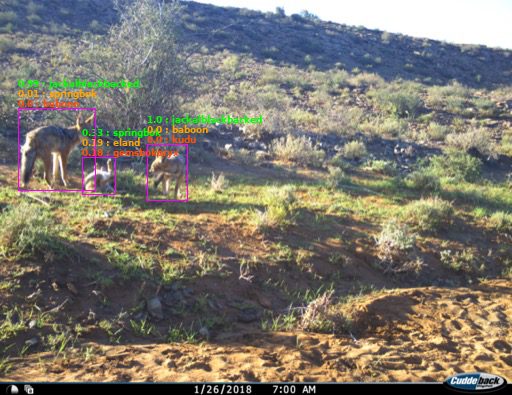

In [5]:
image = Image.open("sample_data/test/jackalblackbacked/KAR_S1_B02_R1_IMAG0937.JPG")
result = utils2.draw_bounding_box(image, megadetector, model, label2cat)
display(result) 

Run the next cell to select an image that you want to classify from the Karoo dataset. 

In [6]:
components = utils2.animal_detection_on_server(display, megadetector, model, label2cat)

display(components['fileChooser'])
display(components['output'])

FileChooser(path='/home/jovyan/work/sample_data/test', filename='', title='', show_hidden=False, select_desc='…

Output()

Run the next cell to upload your own pictures and see the result. Processing a single image can take up to 1 minute depending on its size. 

_Note: any pictures you upload will be transferred to the Coursera server. DeepLearning.AI does not keep records of those images, but we cannot guarantee that those files are not being accessed by others, so use it at your own risk._

In [7]:
components2 = utils2.animal_detection_local(display, megadetector, model, label2cat)

display(components2['fileUpload'])
display(components2['output'])

FileUpload(value={}, accept='image/*', description='Upload')

Output()

## **Congratulations on finishing this lab!**

**Keep up the good work :)**